In [1]:
import mne
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import array
from datetime import datetime

In [2]:
directory_path = 'Y:/Harry_TMS/Auditory'
files = os.listdir(directory_path)
file_name= '20241211_163259_sub-Pilot2_file-Auditory1_raw.fif'
data_path=os.path.join(directory_path,file_name)

# Check if the specific file exists
file_exists = os.path.isfile(data_path)

Opening raw data file Y:/Harry_TMS/Auditory\20241211_163259_sub-Pilot2_file-Auditory1_raw.fif...
    Range : 0 ... 1525499 =      0.000 ...   305.100 secs
Ready.
Reading 0 ... 1525499  =      0.000 ...   305.100 secs...
250 events found on stim channel di32
Event IDs: [2 4]
Using matplotlib as 2D backend.


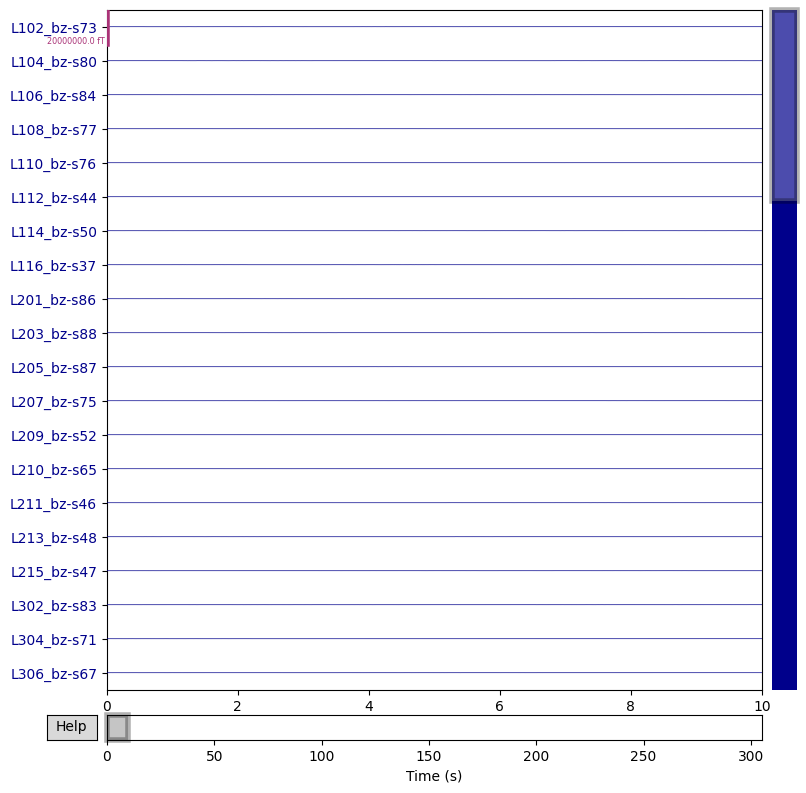

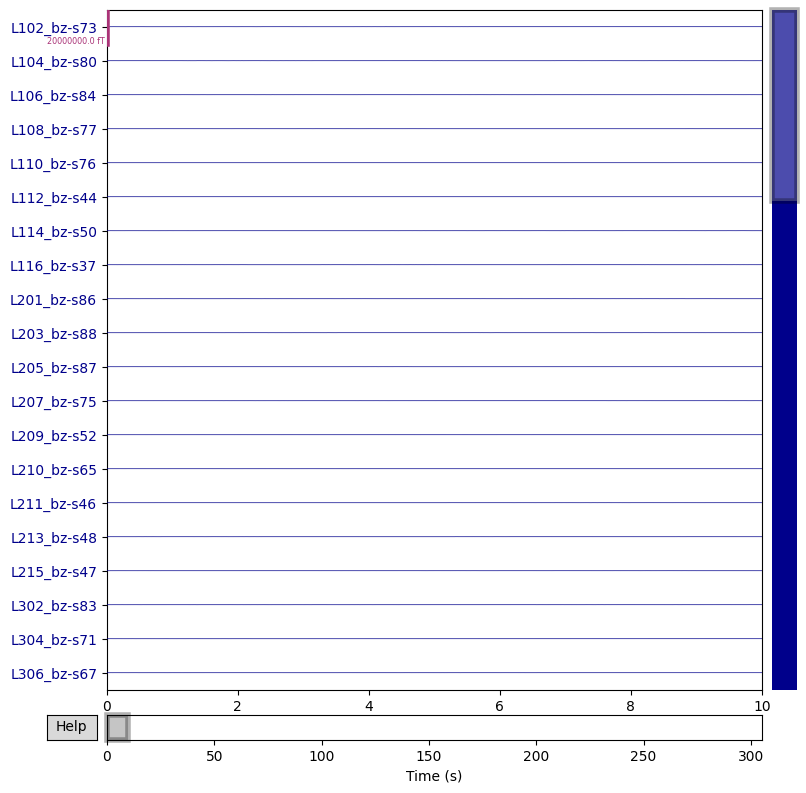

In [3]:
raw = mne.io.read_raw_fif(data_path, preload=True)
events = mne.find_events(raw, stim_channel='di32')

events_ids = {"oddball": 2, "tone":4}

raw.pick('meg')

raw.plot(scalings={"mag":  10e-9})

In [4]:
tmin, tmax = -0.4, 0.8
lowpass, highpass = 40, 0.1
baseline_tmin, baseline_tmax = -0.4, -0.2  # None takes the first timepoint

In [5]:
raw_filtered = raw.copy().filter(highpass, lowpass)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165001 samples (33.000 s)



In [6]:
epochs = mne.Epochs(
    raw_filtered,
    events,
    events_ids,
    tmin=tmin,
    tmax=tmax,
    detrend=1,
    reject=dict(mag=5e-11),
    baseline=(baseline_tmin,baseline_tmax),
    preload=True,
)

Not setting metadata
250 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 250 events and 6001 original time points ...
    Rejecting  epoch based on MAG : ['L114_bz-s50']
    Rejecting  epoch based on MAG : ['L114_bz-s50']
    Rejecting  epoch based on MAG : ['L114_bz-s50']
    Rejecting  epoch based on MAG : ['L114_bz-s50']
    Rejecting  epoch based on MAG : ['L114_bz-s50']
    Rejecting  epoch based on MAG : ['L213_bz-s48', 'L309_bz-s68', 'L310_bz-s45', 'L312_bz-s49', 'L407_bz-s41', 'L409_bz-s43', 'L503_bz-s79', 'L505_bz-s74', 'L507_bz-s70', 'L603_bz-s78', 'L605_bz-s72', 'L607_bz-s9', 'R201_bz-s6', 'R203_bz-s7', 'R207_bz-s10', 'R302_bz-s13', 'R304_bz-s5', 'R307_bz-s2', 'R401_bz-s30', 'R403_bz-s29', 'R405_bz-s40', 'R407_bz-s26', 'R503_bz-s17', 'R505_bz-s24', 'R507_bz-s22', 'R509_bz-s31', 'R606_bz-s14']
    Rejecting  epoch based on MAG : ['L102_bz-s73', 'L104_bz-s80', 'L110_bz-s76', 'L112_bz-s44', 'L114_bz-

In [7]:
print(epochs)

<Epochs | 224 events (all good), -0.4 – 0.8 s (baseline -0.4 – -0.2 s), ~728.2 MiB, data loaded,
 'oddball': 55
 'tone': 169>


In [8]:
# Get the original channel names
ch_names = epochs.info['ch_names']

# Create a dictionary to rename channels by removing the first 8 characters
rename_dict = {name: name[8:] for name in ch_names}

# Rename the channels using the rename_channels method
epochs.rename_channels(rename_dict)

<Epochs | 224 events (all good), -0.4 – 0.8 s (baseline -0.4 – -0.2 s), ~728.2 MiB, data loaded,
 'oddball': 55
 'tone': 169>

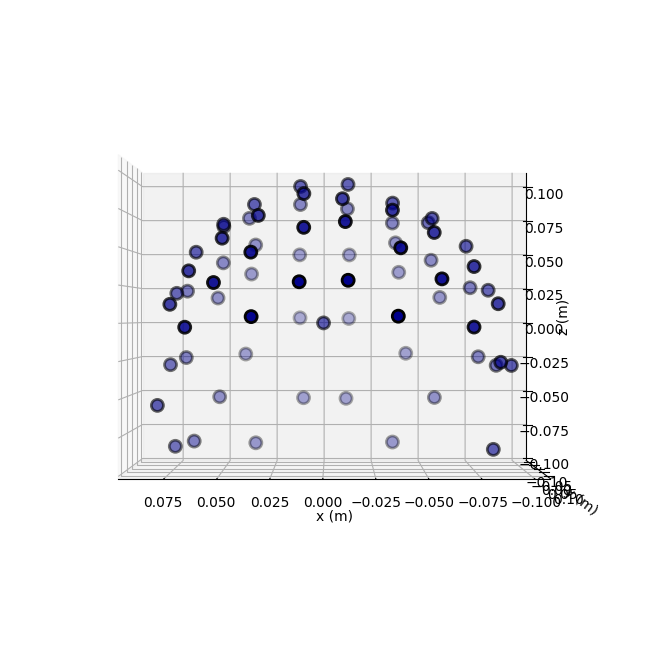

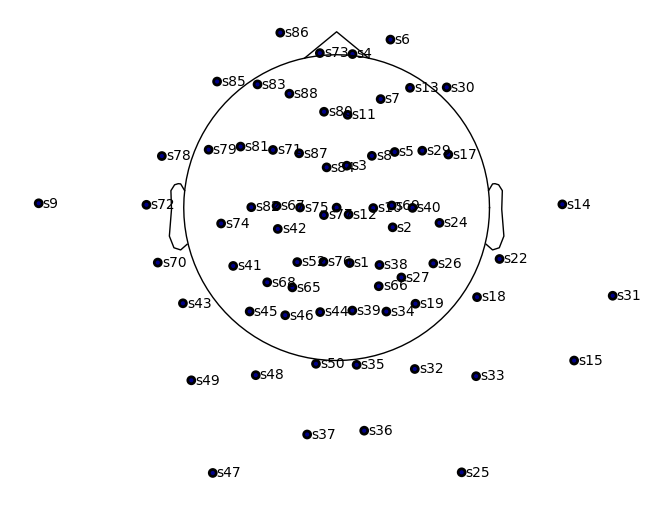

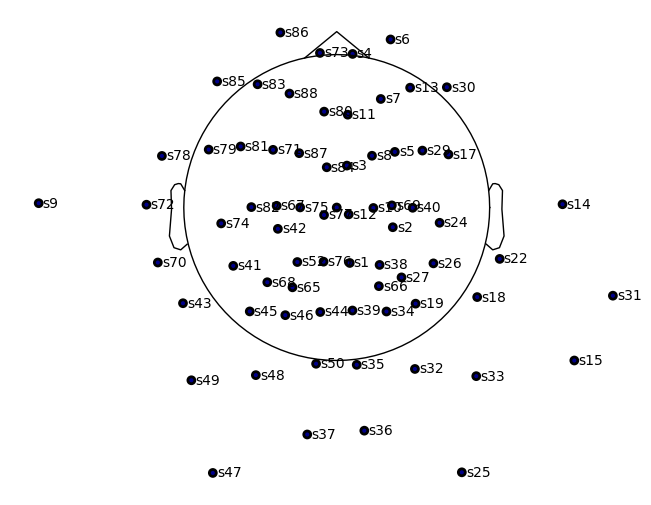

In [9]:
epochs.plot_sensors(kind="3d", ch_type="all")
epochs.plot_sensors(kind="topomap", ch_type="all",show_names=True)

    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\hxc214\AppData\Local\Temp\ipykernel_184\3626356334.py:1: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd = epochs.compute_psd(


Plotting amplitude spectral density (dB=True).
Averaging across epochs before plotting...


c:\Users\hxc214\AppData\Local\Programs\PsychoPy\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


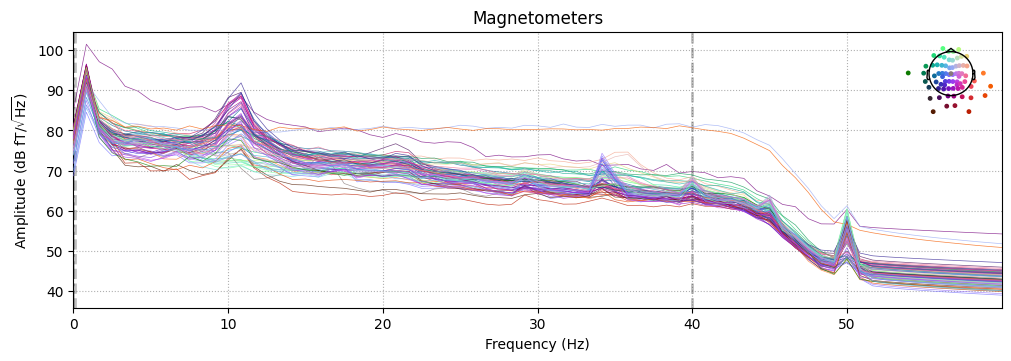

In [10]:
psd = epochs.compute_psd(
    fmax=60, 
    method="multitaper",  # Multitaper is the default
    bandwidth=1          # Smaller value for higher resolution
)
psd.plot(picks="meg", exclude="bads", amplitude=True)


In [11]:
evoked= epochs.copy().average(method='mean').filter(0.0, 30).crop(-0.1,0.8)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 2201 samples (0.440 s)



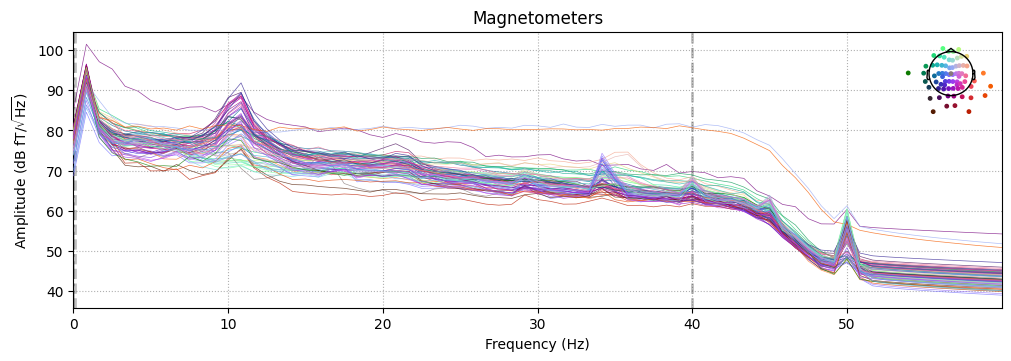

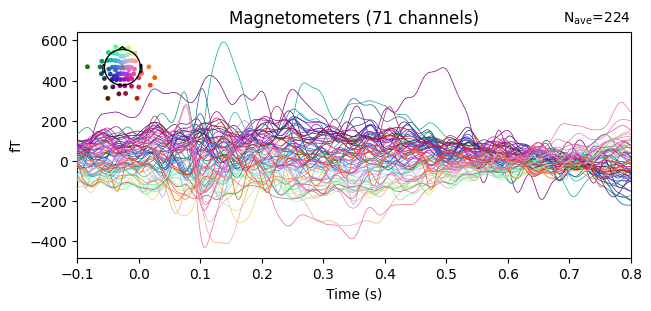

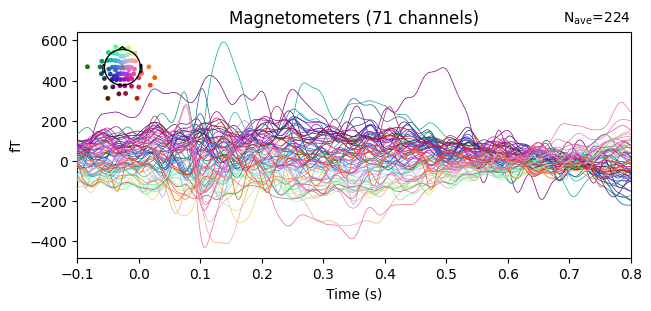

In [12]:
evoked.plot(time_unit="s")

Applying baseline correction (mode: mean)


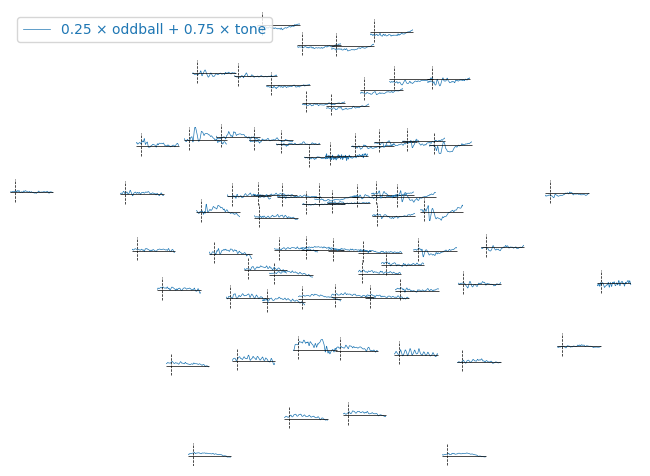

In [13]:
%matplotlib inline
evoked.copy().apply_baseline(baseline=(-0.1, 0))
evoked.copy().pick('mag').plot_topo();